In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
# Veriyi okuma
veri = pd.read_csv("/content/metadataa4.csv",encoding="utf-8",sep=',')
print(veri.columns)

Index(['aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight',
       'roiWidth', 'roiDepth'],
      dtype='object')


In [ ]:
#Bağımlı ve bağımsız değişkenleri belirtme
X = veri.drop('aclDiagnosis',axis=1)
y = veri['aclDiagnosis']

In [ ]:

# Veri setinin boyutunu kontrol etmek için yazdırma
print("Bağımsız Değişkenler (X):")
print(X.head()) # İlk beş gözlemi yazdırır
print("\nBağımlı Değişken (y):")
print(y.head()) # İlk beş gözlemi yazdırır

Bağımsız Değişkenler (X):
   kneeLR  roiX  roiY  roiZ  roiHeight  roiWidth  roiDepth
0       1   139   184    14         74        72         3
1       0   113   105    10         83        98         6
2       1   120   117    15        101       115         2
3       0   117   124    12         91        80         3
4       1   122   105    14         83        98         4

Bağımlı Değişken (y):
0    0
1    0
2    1
3    0
4    0
Name: aclDiagnosis, dtype: int64


In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.svm import SVC
# SVM modelini oluşturma
svm_model = SVC(kernel='linear', random_state=42)

# Modeli eğitme
svm_model.fit(X_train, y_train)
# Test seti üzerinde tahmin yapma
svm_y_pred = svm_model.predict(X_test)
#snn lstm

In [ ]:
# Model performansını değerlendirme
print("SVM Model Performansı:")
print(classification_report(y_test, svm_y_pred))

SVM Model Performansı:
              precision    recall  f1-score   support

           0       0.77      0.61      0.68       129
           1       0.25      0.23      0.24        44
           2       0.10      0.36      0.15        11

    accuracy                           0.51       184
   macro avg       0.37      0.40      0.36       184
weighted avg       0.61      0.51      0.55       184



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


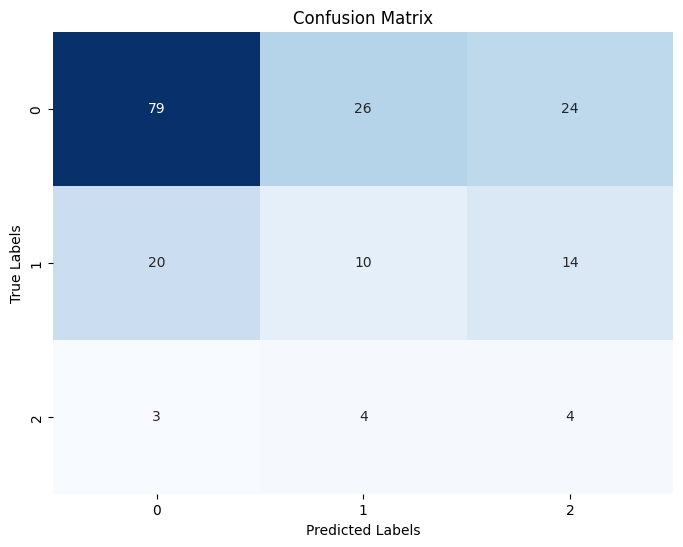

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, svm_y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Karar ağacı modelini oluşturma
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Modeli eğitme
decision_tree_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
dt_y_pred = decision_tree_model.predict(X_test)

In [ ]:
# Model performansını değerlendirme
print("Karar Ağacı Model Performansı:")
print(classification_report(y_test, dt_y_pred))

Karar Ağacı Model Performansı:
              precision    recall  f1-score   support

           0       0.78      0.36      0.49       129
           1       0.28      0.52      0.37        44
           2       0.09      0.36      0.15        11

    accuracy                           0.40       184
   macro avg       0.38      0.41      0.33       184
weighted avg       0.62      0.40      0.44       184



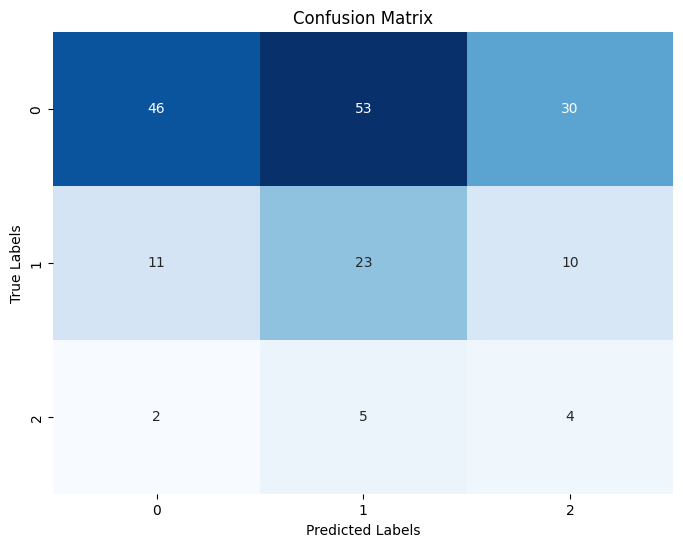

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, dt_y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest modelini oluşturma
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitme
random_forest_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
rf_y_pred = random_forest_model.predict(X_test)


In [ ]:
# Model performansını değerlendirme
print("Random Forest Model Performansı:")
print(classification_report(y_test, rf_y_pred))


Random Forest Model Performansı:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       129
           1       0.33      0.27      0.30        44
           2       0.10      0.18      0.12        11

    accuracy                           0.60       184
   macro avg       0.39      0.40      0.39       184
weighted avg       0.62      0.60      0.61       184



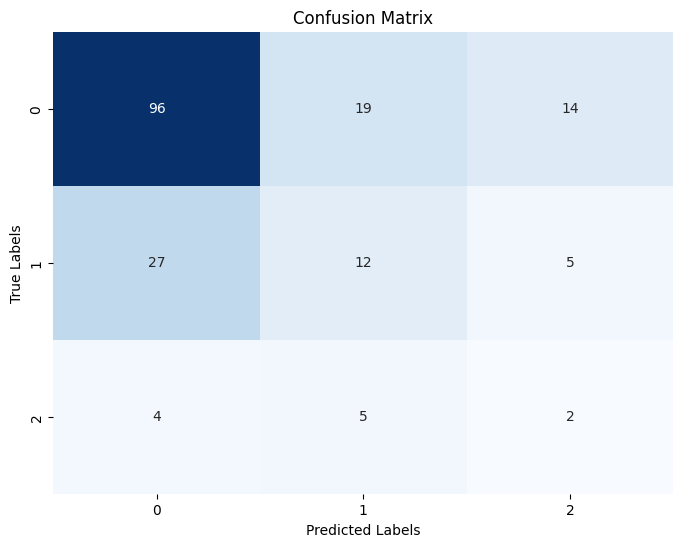

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, rf_y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN modelini oluşturma
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5 olarak ayarlayalım

# KNN modelini eğitme
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
knn_y_pred = knn_model.predict(X_test)



In [ ]:
# Model performansını değerlendirme
print("KNN Model Performansı:")
print(classification_report(y_test, knn_y_pred))



KNN Model Performansı:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       129
           1       0.26      0.34      0.30        44
           2       0.09      0.27      0.13        11

    accuracy                           0.48       184
   macro avg       0.37      0.39      0.36       184
weighted avg       0.60      0.48      0.53       184



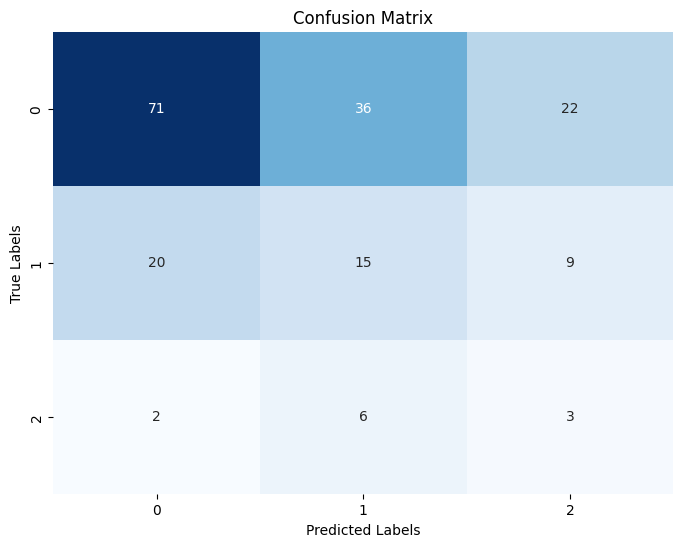

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, knn_y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting modelini oluşturma
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Modeli eğitme
gradient_boosting_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
gb_y_pred = gradient_boosting_model.predict(X_test)


In [ ]:

# Model performansını değerlendirme
print("Gradient Boosting Model Performansı:")
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Model Performansı:
              precision    recall  f1-score   support

           0       0.75      0.59      0.66       129
           1       0.26      0.27      0.27        44
           2       0.08      0.27      0.13        11

    accuracy                           0.49       184
   macro avg       0.36      0.38      0.35       184
weighted avg       0.59      0.49      0.53       184



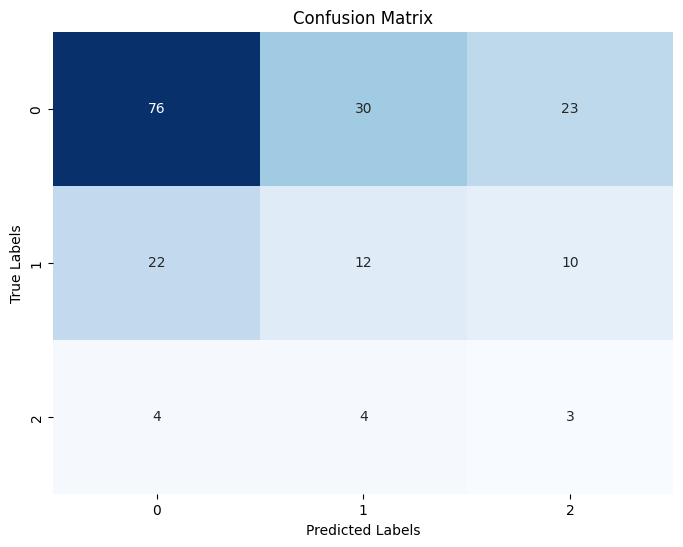

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test, gb_y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
# Etiketleri one-hot encoding ile dönüştürme
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

# Model oluşturma
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Giriş katmanı ve gizli katman
model.add(Dense(32, activation='relu'))  # İkinci gizli katman
model.add(Dense(3, activation='softmax'))  # Çıkış katmanı, üç sınıflı sınıflandırma için softmax aktivasyon fonksiyonu

# Model derleme
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train_onehot, epochs=70, batch_size=8, validation_split=0.2)  # %20'sini doğrulama için ayır
# Model tahmini
y_pred_onehot = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_onehot, axis=1)
y_test_classes = np.argmax(y_test_onehot, axis=1)


Epoch 1/70
169/169 [==============================] - 3s 7ms/step - loss: 1.8752 - accuracy: 0.4532 - val_loss: 3.8247 - val_accuracy: 0.0000e+00
Epoch 2/70
169/169 [==============================] - 1s 5ms/step - loss: 1.3240 - accuracy: 0.4480 - val_loss: 1.0982 - val_accuracy: 0.2997
Epoch 3/70
169/169 [==============================] - 1s 3ms/step - loss: 1.1651 - accuracy: 0.4903 - val_loss: 1.6226 - val_accuracy: 0.0297
Epoch 4/70
169/169 [==============================] - 1s 3ms/step - loss: 1.1208 - accuracy: 0.4740 - val_loss: 2.0919 - val_accuracy: 0.0148
Epoch 5/70
169/169 [==============================] - 1s 5ms/step - loss: 1.1261 - accuracy: 0.4785 - val_loss: 2.7274 - val_accuracy: 0.0000e+00
Epoch 6/70
169/169 [==============================] - 1s 5ms/step - loss: 1.1801 - accuracy: 0.4591 - val_loss: 1.3717 - val_accuracy: 0.1899
Epoch 7/70
169/169 [==============================] - 1s 5ms/step - loss: 1.1106 - accuracy: 0.4591 - val_loss: 2.5793 - val_accuracy: 0.000

In [ ]:

# Model performansını değerlendirme
print("Yapay Sinir Ağı Model Performansı:")
print(classification_report(y_test_classes, y_pred_classes))

Yapay Sinir Ağı Model Performansı:
              precision    recall  f1-score   support

           0       0.82      0.41      0.55       129
           1       0.28      0.66      0.40        44
           2       0.00      0.00      0.00        11

    accuracy                           0.45       184
   macro avg       0.37      0.36      0.31       184
weighted avg       0.64      0.45      0.48       184



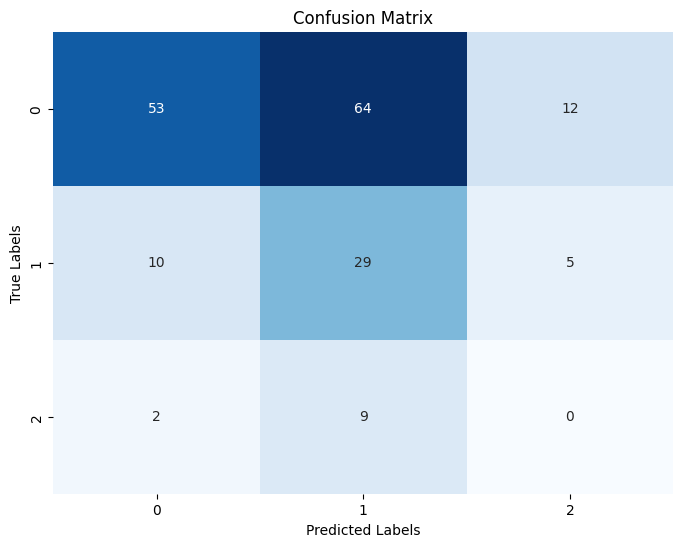

In [ ]:
# Karmaşıklık matrisini hesaplama
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Veriyi 1D CNN için uygun şekle dönüştürme
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Bağımlı değişkeni one-hot encoding ile dönüştürme
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 1D CNN modelini oluşturma
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # 3 sınıf olduğu için çıktı katmanı 3 nöron

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Test seti üzerinde tahmin yapma
cnn_y_pred = model.predict(X_test)
y_pred_classes = np.argmax(cnn_y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


Epoch 1/100
211/211 [==============================] - 2s 5ms/step - loss: 1.0282 - accuracy: 0.4498 - val_loss: 1.0866 - val_accuracy: 0.4022
Epoch 2/100
211/211 [==============================] - 1s 3ms/step - loss: 0.9672 - accuracy: 0.5163 - val_loss: 0.9794 - val_accuracy: 0.4891
Epoch 3/100
211/211 [==============================] - 1s 3ms/step - loss: 0.9368 - accuracy: 0.5354 - val_loss: 0.9597 - val_accuracy: 0.5272
Epoch 4/100
211/211 [==============================] - 1s 5ms/step - loss: 0.9049 - accuracy: 0.5740 - val_loss: 1.0698 - val_accuracy: 0.4130
Epoch 5/100
211/211 [==============================] - 1s 5ms/step - loss: 0.8873 - accuracy: 0.5948 - val_loss: 1.0006 - val_accuracy: 0.4783
Epoch 6/100
211/211 [==============================] - 1s 5ms/step - loss: 0.8652 - accuracy: 0.6049 - val_loss: 1.0101 - val_accuracy: 0.4837
Epoch 7/100
211/211 [==============================] - 1s 4ms/step - loss: 0.8394 - accuracy: 0.6275 - val_loss: 1.0699 - val_accuracy: 0.4239

In [ ]:
;# Model performansını değerlendirme
print("1D CNN Model Performansı:")
print(classification_report(y_test, y_pred_classes))



1D CNN Model Performansı:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       129
           1       0.28      0.34      0.31        44
           2       0.04      0.09      0.05        11

    accuracy                           0.51       184
   macro avg       0.36      0.35      0.34       184
weighted avg       0.60      0.51      0.55       184



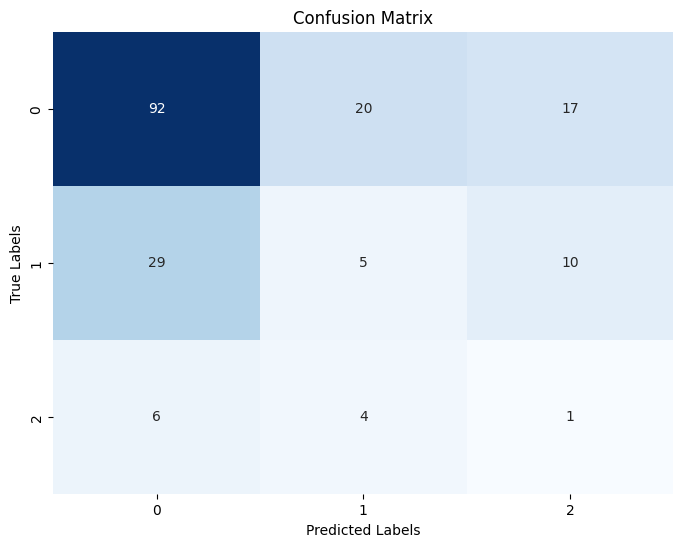

In [ ]:
6# Karmaşıklık matrisini hesaplama ve görselleştirme
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model performans metriklerini hesaplama
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1
# Model adları ve tahminler
model_names = ["SVM", "Karar Ağacı", "Rastgele Orman", "Gradyan Arttırıcı", "Yapay Sinir Ağları", "K-En Yakın Komşu (KNN)","1D CNN"]
y_preds = [svm_y_pred, dt_y_pred, rf_y_pred, gb_y_pred, y_pred_classes, knn_y_pred, y_pred_classes]

# Gerçek değerler
y_true = y_test  # Gerçek test etiketleri buraya gelmeli
# Performans metriklerini hesaplama
model_metrics = []
for name, y_pred in zip(model_names, y_preds):
    accuracy, precision, recall, f1 = calculate_metrics(y_true, y_pred)
    model_metrics.append({"Model": name, "Doğruluk": accuracy, "Kesinlik": precision, "Hassasiyet": recall, "F1 Skoru": f1})

# Model metriklerini DataFrame'e dönüştürme
performance_metrics = pd.DataFrame(model_metrics)


# Tabloyu görüntüleme
print(performance_metrics)


                    Model  Doğruluk  Kesinlik  Hassasiyet  F1 Skoru
0                     SVM  0.505435  0.608475    0.505435  0.545491
1             Karar Ağacı  0.396739  0.619946    0.396739  0.439781
2          Rastgele Orman  0.597826  0.615359    0.597826  0.605027
3       Gradyan Arttırıcı  0.494565  0.589742    0.494565  0.532721
4      Yapay Sinir Ağları  0.510870  0.599560    0.510870  0.547770
5  K-En Yakın Komşu (KNN)  0.483696  0.603442    0.483696  0.527443
6                  1D CNN  0.510870  0.599560    0.510870  0.547770


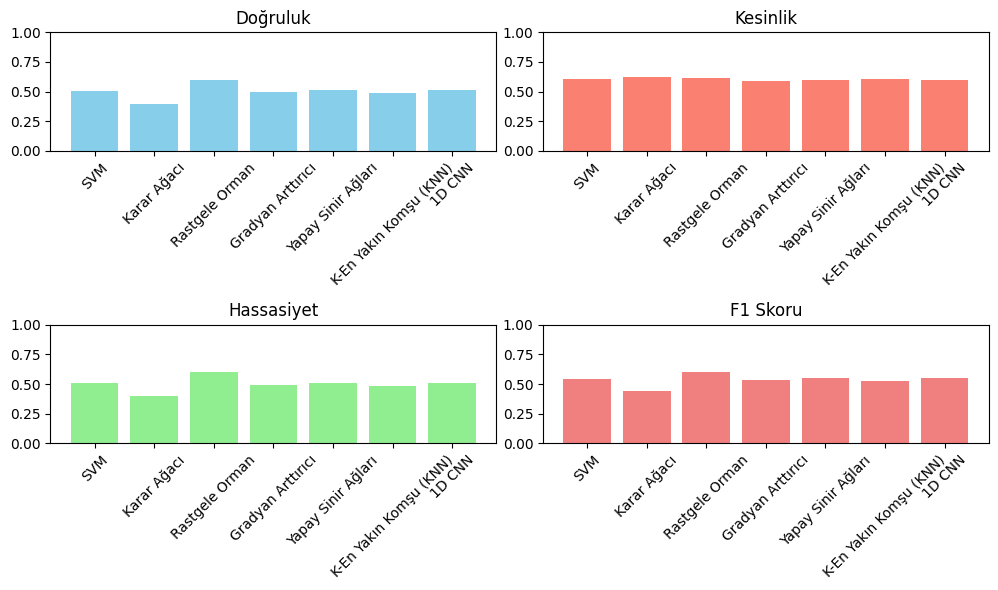

In [ ]:
import matplotlib.pyplot as plt

# Model isimleri ve performans metrikleri
model_names = performance_metrics["Model"]
accuracy = performance_metrics["Doğruluk"]
precision = performance_metrics["Kesinlik"]
recall = performance_metrics["Hassasiyet"]
f1 = performance_metrics["F1 Skoru"]

# Grafik oluşturma
plt.figure(figsize=(10, 6))

# Doğruluk çubuk grafiği
plt.subplot(2, 2, 1)
plt.bar(model_names, accuracy, color='skyblue')
plt.title('Doğruluk')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Kesinlik çubuk grafiği
plt.subplot(2, 2, 2)
plt.bar(model_names, precision, color='salmon')
plt.title('Kesinlik')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Hassasiyet çubuk grafiği
plt.subplot(2, 2, 3)
plt.bar(model_names, recall, color='lightgreen')
plt.title('Hassasiyet')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# F1 Skoru çubuk grafiği
plt.subplot(2, 2, 4)
plt.bar(model_names, f1, color='lightcoral')
plt.title('F1 Skoru')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
